In [1]:
import os
import sys
from pathlib import Path

ROOT_DIR = Path(os.getcwd()).parent

sys.path.append(str(ROOT_DIR / 'src'))
sys.path.append(str(ROOT_DIR))
sys.path.append(str(ROOT_DIR / 'promptsource'))
sys.path.append(str(ROOT_DIR / 'promptsource' / 'promptsource'))

from src.evals import *
from src.methods import *
from src.plotting import *

README.md: 0.00B [00:00, ?B/s]

boolq/train-00000-of-00001.parquet:   0%|          | 0.00/3.85M [00:00<?, ?B/s]

boolq/validation-00000-of-00001.parquet:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

boolq/test-00000-of-00001.parquet:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/9427 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3270 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3245 [00:00<?, ? examples/s]

Split: 100 train, 100 test examples
Some results missing, computing activations...
Loading model: meta-llama/Llama-3.1-8B
Detected positive token: 'True' (ID: 2575)
Detected negative token: 'False' (ID: 4139)
Computing activations for all prompts...


Processing batches:   0%|          | 0/25 [00:00<?, ?it/s]

Processing batches:   0%|          | 0/25 [00:00<?, ?it/s]

Running method: supervised


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Running method: ccs


Training CCS:   0%|          | 0/1000 [00:00<?, ?it/s]

Final loss = 0.110525
Running method: pca


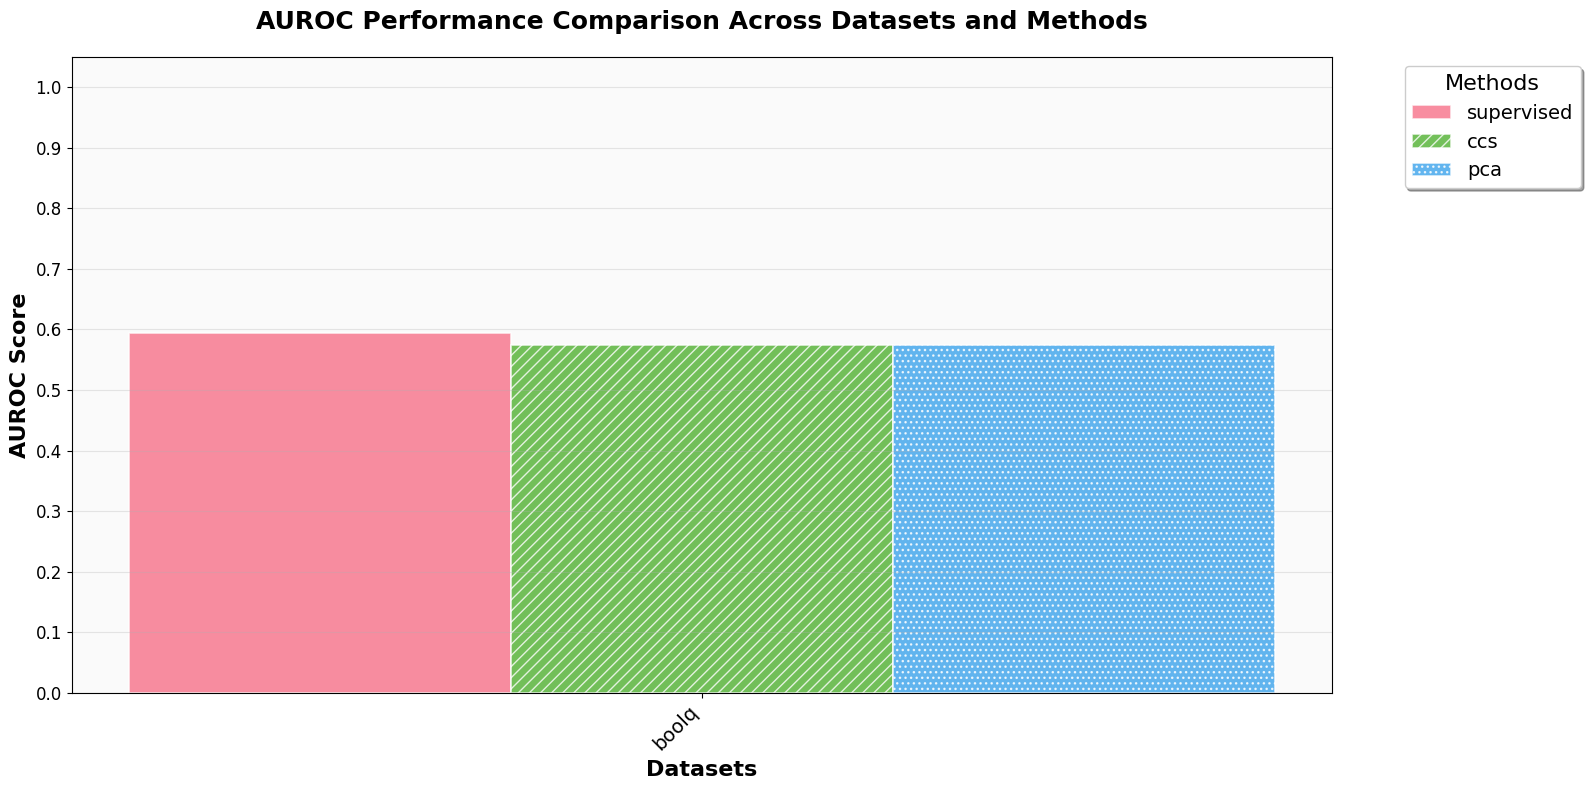

In [8]:
all_available_datasets = [
    "boolq",
    # "dbpedia_14",
    # "imdb",
    # "ag_news",
    # "amazon_polarity",
    # "piqa",
    #"got_sp_en_trans", # Empty for some reason
    # "rte",
    #"got_larger_than",
    #"got_cities",
    #"copa",
]

model_name = "meta-llama/Llama-3.1-8B"
    
all_results_dict = {}
for dataset_name in all_available_datasets:
    dataset = load_dataset_for_ccs(
        dataset_name=dataset_name,
        split="train", 
        max_examples=200,
        seed=42,
    )
    all_results_dict[dataset_name] = get_results_on_dataset(
        dataset=dataset,
        model_name=model_name,
        layer_idx=32,
        batch_size=8,
        run_methods = ["supervised", "ccs", "pca"]
    )

# Option 1: Modern bar plot
fig1, ax1 = plot_auroc_comparison(all_results_dict, style='modern')
plt.show()

In [3]:
print(all_results_dict)

{'ag_news': [{'prompt': "Consider the following example: 'Yahoo boosts music portal (SiliconValley.com) SiliconValley.com - Yahoo, seeking to add e-commerce to its Internet music portal, will pay  #36;160 million in cash to acquire Musicmatch, a critically acclaimed but little known music jukebox and download service.'. Assertion: the topic of this example is Science and technology. Answer True or False. False", 'truth_label': 0, 'methods': {'finetune_zero_shot': nan}}, {'prompt': 'Consider the following example: \'Stocks Seen Flat as Nortel and Oil Weigh  NEW YORK (Reuters) - U.S. stocks were set to open near  unchanged on Thursday after a warning from technology  bellwether Nortel Networks Corp. &lt;A HREF="http://www.investor.reuters.com/FullQuote.aspx?ticker=NT.N target=/stocks/quickinfo/fullquote"&gt;NT.N&lt;/A&gt; dimmed hopes, while  stubbornly high oil prices also weighed on sentiment.\'. Assertion: the topic of this example is Business. Answer True or False. False', 'truth_lab

In [ ]:
# Test repeng installation
import repeng
from repeng import extract_directions
print(f"Repeng version: {repeng.__version__}")
print("Repeng imported successfully!")

# Test basic functionality
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

# You can test with a smaller model first
test_model_name = "meta-llama/Llama-3.2-1B"
print(f"\nTesting with model: {test_model_name}")

# Example of extracting directions - adapt this to your use case
# from repeng.extract import extract_directions, DatasetTemplate
# You can explore the repeng API for your specific needs


In [ ]:
# Example: Using repeng for representation engineering
from repeng import ControlVector, ControlModel, DatasetTemplate

# Create a dataset template for extracting directions
# This is useful for finding truth/falsehood directions in model representations
honesty_template = DatasetTemplate(
    positive_examples=[
        "I need to be honest and tell the truth",
        "Let me give you the accurate information",
        "The facts are as follows",
    ],
    negative_examples=[
        "I should lie about this",
        "Let me make something up",
        "The false information is",
    ],
    suffix_list=[""],  # Empty suffix for basic examples
)

# You can also work with your existing activations
# Example of how to integrate with your current setup:
def extract_truth_directions(model, tokenizer, dataset):
    """Extract truth/falsehood directions from model activations."""
    # This would integrate with your existing probing setup
    pass

# For more advanced usage, check repeng documentation:
# - Extract control vectors for specific behaviors
# - Apply control vectors to steer model outputs
# - Analyze directions in representation space


In [ ]:
# Quick reference for repeng usage with your probing experiments

# 1. Extract control vectors from paired examples
from repeng.extract import extract_directions, ControlVector

# 2. Use with your existing model and data
# model = AutoModelForCausalLM.from_pretrained(model_name)
# tokenizer = AutoTokenizer.from_pretrained(model_name)

# 3. Create control vectors for truth/falsehood
# truth_vector = extract_directions(
#     model=model,
#     tokenizer=tokenizer,
#     positive_examples=["true statements"],
#     negative_examples=["false statements"],
#     layer_id=33,  # Same layer you're using
# )

# 4. Apply control vectors to influence model behavior
# controlled_model = ControlModel(model, [truth_vector])

# 5. Analyze directions in representation space
# This complements your CCS and supervised probing methods!
